
 #  <span style="color:#D47FAC;"> <center>LIST 5 </center> </span>

Authors: _Jakubik Małgorzata, Szymkowiak Magdalena_

## <span style="color:#D47FAC;">TASK 1</span> 

In [366]:
import numpy as np
from scipy import linalg
from scipy import stats
import time, random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [367]:
def cramer_matrix(n):
    """
    Funkcja rozwiązuje cramerowski układ równań.
    @param n: rozmiar macierzy
    """
    a = np.array([[random.randint(-50, 50) for _ in range(n)] for _ in range(n)])
    b = np.array([random.randint(-50, 50) for _ in range(n)])
    return linalg.solve(a, b)

In [368]:
def time_check(n):
    """
    Mierzy czas działania funkci 'cramer_matrix' w zależnośći od wielkości macierz.
    @param: rozmiar macierzy
    """
    t0 = time.time()
    cramer_matrix(n)
    t1 = time.time()

    return t1 - t0

In [369]:
def log_plot(min=500, max=8000, step=800):
    """
    Funkcja rysuje wykres złożoności obliczeniowej funkcji 'cramer_matrix' oraz jej przybliżenie 
    @param min: minimalna wartość argumentów
    @param max: maksymalna wartość argumentów
    @param step: krok z jakim idziemy od minimalnej wartości do maksymalnej
    """
    x = [i for i in range(min, max, step)]
    times = [time_check(i) for i in x]

    slope = stats.linregress(np.log(x), np.log(times))[0]

    plt.plot(x, times, '.', label='Dane')
    plt.loglog(x, times, label='Wsp kierunkowy = %4f' % slope)

    plt.xlabel("Wielkość macierzy")
    plt.ylabel("Czas wykonania operacji")
    plt.title("Wykres czasu w zależności od wielkości macierzy w skali logarytmicznej")
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

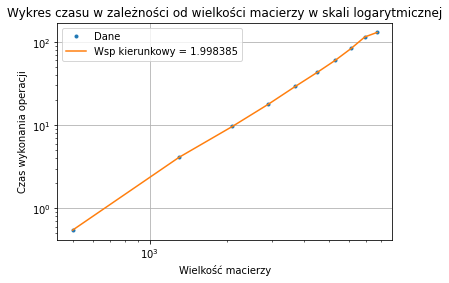

In [373]:
log_plot()

## <span style="color:#D47FAC;">TASK 2</span> 

Wieża z Hanoi to gra polegająca na przeniesieniu wieży z jednego słupka na inny, przy pomocy trzeciego, dodatkowego. Wieża składa się z kilku krążków, o różnych średnicach. Przenoszenie krążków ma dwie zasady: można za jednym razem przenieść jeden krążek i nie można wkładać krążka o większej średnicy na krążek o mniejszej średnicy.

Zagadnienie wieży z Hanoi rozwiązałyśmy za pomocą rekurencji. Napisałyśmy do tego dwie pomocnicze funkcje: moveDisc, Hanoi. Funkcja `moveTower` zawiera algorytm rozwiązujący wieżę Hanoi. Użyłyśmy także klasy `Stack()`, której napisanie było zadaniem na poprzedniej liście. 

In [91]:
from helpy import Stack

In [334]:
def moveDisc(src_p,dest_p,extra_p):
    """
    Funkcja pomocnicza, przenosi krążki z jednego słupka na docelowy słupek.
    @param src_p: źródłowy słupek, z którego zabieramy krążek
    @param dest_p: słupek na który przenosimy krążek
    @param extra_p: pomocniczy słupek
    """
    dest_p[1].push(src_p[1].pop())
    print("moving disc from",src_p[0],"to",dest_p[0])
    print(src_p[0],"=",src_p[1], extra_p[0],"=",extra_p[1], dest_p[0],"=",dest_p[1])

In [335]:
def moveTower(nDiscs,src_p,extra_p,dest_p):
    """
    Rozwiązuje zagadnienie wieży Hanoi, za pomocą rekurencji.
    @param nDiscs: ilość krążków do przeniesienia
    @param src_p: źródłowy słupek, z którego zabieramy krążek
    @param dest_p: słupek na który przenosimy krążek
    @param extra_p: pomocniczy słupek
    """
    if nDiscs==0:
        return "Your Tower of Hanoi is empty!"
    elif nDiscs == 1:
        moveDisc(src_p, dest_p,extra_p)
    else:
        moveTower(nDiscs-1, src_p,dest_p, extra_p)
        moveDisc(src_p, dest_p,extra_p)
        moveTower(nDiscs-1, extra_p, src_p, dest_p)

In [336]:
def Hanoi(nDiscs,src,extra,dest):
    """
    Funkcja wywołuje algorytm wieży z Hanoi.
    @param nDiscs: ilość krążków do przeniesienia
    @param src: nazwa źródłowego słupeka, z którego zabieramy krążek
    @param dest: nazwa słupka na który przenosimy krążek
    @param extra: nazwa pomocniczego słupka
    @return: kroki jakie należy wykonać oraz prezentacja zapełnienia słupków na poszczególnych etapach
    """
    src_p= (src,Stack()) #(nazwa słupka,zawartość)
    extra_p=(extra,Stack())
    dest_p=(dest,Stack())
    
    for i in range(nDiscs):
        src_p[1].push(nDiscs-i)
        
    return moveTower(nDiscs,src_p,extra_p,dest_p)

In [339]:
Hanoi(2,"A","B","C")

moving disc from A to B
A = [2] C = [] B = [1]
moving disc from A to C
A = [] B = [1] C = [2]
moving disc from B to C
B = [] A = [] C = [2, 1]


In [341]:
Hanoi(4,"A","L","E")

moving disc from A to L
A = [4, 3, 2] E = [] L = [1]
moving disc from A to E
A = [4, 3] L = [1] E = [2]
moving disc from L to E
L = [] A = [4, 3] E = [2, 1]
moving disc from A to L
A = [4] E = [2, 1] L = [3]
moving disc from E to A
E = [2] L = [3] A = [4, 1]
moving disc from E to L
E = [] A = [4, 1] L = [3, 2]
moving disc from A to L
A = [4] E = [] L = [3, 2, 1]
moving disc from A to E
A = [] L = [3, 2, 1] E = [4]
moving disc from L to E
L = [3, 2] A = [] E = [4, 1]
moving disc from L to A
L = [3] E = [4, 1] A = [2]
moving disc from E to A
E = [4] L = [3] A = [2, 1]
moving disc from L to E
L = [] A = [2, 1] E = [4, 3]
moving disc from A to L
A = [2] E = [4, 3] L = [1]
moving disc from A to E
A = [] L = [1] E = [4, 3, 2]
moving disc from L to E
L = [] A = [] E = [4, 3, 2, 1]


Złożoność obliczeniowa wzrasta niezwykle szybko w miarę zwiększania ilości krążków w wieży.

## <span style="color:#D47FAC;">TASK 3</span> 

Krzywa Hilberta jest krzywą, która wypełnia całkowicie płaszczyznę.

In [342]:
from turtle import *

In [351]:
def hilbert_curve(rank, step, angle=90):
    """
    Funkcja  .
    @param rank: złożoność
    @param step: 
    @param angle: kąt z jakim obraca się żółw
    """
    if rank <= 0:
        return

    left(angle)
    hilbert_curve(rank-1, step, -angle)

    forward(step)
    right(angle)
    hilbert_curve(rank-1, step, angle)

    forward(step)
    hilbert_curve(rank-1, step, angle)

    right(angle)
    forward(step)
    hilbert_curve(rank-1, step, -angle)

    left(angle)

In [352]:
def draw_hilbert_curve(rank=4, step=10):
    """
    Rysuje krzywą Hilberta.
    @param rank:
    @param step:
    """
    if not (isinstance(rank, int) and isinstance(step, int)):
        raise TypeError("Wrong input")

    screen = Screen()

    speed('fastest')
    title("Hilbert Curve")

    hilbert_curve(rank, step)

    screen.exitonclick()

In [349]:
draw_hilbert_curve()

<img src="hilbert.PNG">

## <span style="color:#D47FAC;">TASK 4</span> 

Krzywa Kocha jest krzywą fraktalną. Krzywa ta jest nieskończenie długa i mieści się w skończonej powierzchni. Jesteśmy zatem w stanie narysować aby jej pewne przybliżenie. 
Rysowanie jej polega na podzieleniu odcinka *l* na 3 równe części. W miejsce środkowej wstawiane są dwa odcinki długości $\frac{1}{3}l$, nachylone względem niej pod kątem 60°. Tą czynność powtrarzamy.

In [357]:
def koch_curve(rank, length_step, angle=60):
    """
    Rekurencyjny algorytm rysujący krzywą Kocha
    @param rank:
    @param length_step:
    @param angle: kąt z jakim obraca się żółw
    """
    if rank == 0:
        forward(length_step)
        return
    koch_curve(rank - 1, length_step/3)
    left(angle)
    koch_curve(rank - 1, length_step/3)
    right(180-angle)
    koch_curve(rank - 1, length_step/3)
    left(angle)
    koch_curve(rank - 1, length_step/3)

In [358]:
def draw_koch_curve(rank=3, length_step=300):
    """
    Rysuje krzywą Kocha.
    @param rank:
    @param length_step:
    """
    screen = Screen()

    speed('fastest')
    title("Koch Curve")

    penup()
    backward(length_step/2)
    pendown()

    koch_curve(rank, length_step)

    screen.exitonclick()

In [364]:
 draw_koch_curve()

<img src="pics/koch_curve.PNG">

Połączenie 3 krzycyh Kocha daje nam kształt płatka śniegu.

In [359]:
def draw_koch_snowflake(rank=4, length_step=300):
    """
    Rysuje krzywą zwaną płatkiem Kocha
    @param rank: złożoność 
    @param length_step:
    """
    screen = Screen()

    speed('fastest')
    title("Koch Snowflake")

    penup()
    backward(length_step / 2)
    pendown()

    for i in range(rank-1):
        koch_curve(rank, length_step)
        right(120)

    screen.exitonclick()

In [360]:
draw_koch_snowflake()

<img src="snowflake.PNG">

#### <span style="color:#D47FAC;"> <center> Link to our code: https://github.com/maggszy/date_algorithm/tree/main/list5</center> </span>